# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [8]:
!python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from typing import Callable

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


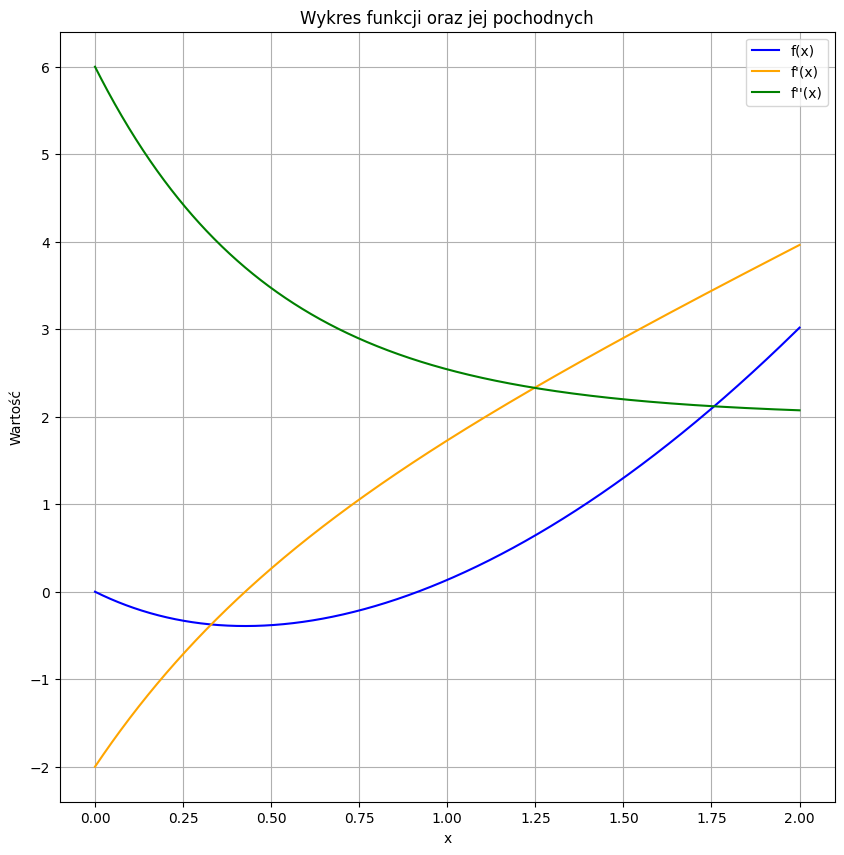

In [6]:
# ===== Twoja implementacja tutaj =====
a,b = 0,2
x = np.linspace(a,b, 1000)
y = main.func(x)
dy = main.dfunc(x)
ddy = main.ddfunc(x)
# ======================================
plt.figure(figsize=(10, 10))
plt.plot(x, y, label='f(x)', color='blue')
plt.plot(x, dy, label="f'(x)", color='orange')
plt.plot(x, ddy, label="f''(x)", color='green')
plt.title('Wykres funkcji oraz jej pochodnych')
plt.xlabel('x')
plt.ylabel('Wartość')
plt.legend()
plt.grid()
plt.show()

na oko to tak w 1.25,1.75,0.30 jest miejsce zerowe

---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

In [10]:
def bisection(
    a: int | float,
    b: int | float,
    f: Callable[[float], float],
    epsilon: float,
    max_iter: int,
) -> tuple[float, int] | None:
    """Funkcja aproksymująca rozwiązanie równania f(x) = 0 na przedziale [a,b] 
    metodą bisekcji.

    Args:
        a (int | float): Początek przedziału.
        b (int | float): Koniec przedziału.
        f (Callable[[float], float]): Funkcja, dla której poszukiwane jest 
            rozwiązanie.
        epsilon (float): Tolerancja zera maszynowego (warunek stopu).
        max_iter (int): Maksymalna liczba iteracji.

    Returns:
        (tuple[float, int]):
            - Aproksymowane rozwiązanie,
            - Liczba wykonanych iteracji.
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    if epsilon <= 0 or max_iter <= 0:
        return None
    if not isinstance(a, (int, float)) or not isinstance(b, (int, float)):
        return None
    if not isinstance(f, Callable):
        return None
    if not isinstance(epsilon, float):
        return None
    if f(a) * f(b) > 0:
        return None
    
    iter_count = 0
    while iter_count < max_iter:
        c = (a +b) / 2
        if abs(f(c)) < epsilon or (b - a) / 2 < epsilon:
            return c, iter_count + 1
        iter_count += 1
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return None

---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


In [11]:
def secant(
    a: int | float,
    b: int | float,
    f: Callable[[float], float],
    epsilon: float,
    max_iters: int,
) -> tuple[float, int] | None:
    """funkcja aproksymująca rozwiązanie równania f(x) = 0 na przedziale [a,b]
    metodą siecznych.

    Args:
        a (int | float): Początek przedziału.
        b (int | float): Koniec przedziału.
        f (Callable[[float], float]): Funkcja, dla której poszukiwane jest
            rozwiązanie.
        epsilon (float): Tolerancja zera maszynowego (warunek stopu).
        max_iters (int): Maksymalna liczba iteracji.

    Returns:
        (tuple[float, int]):
            - Aproksymowane rozwiązanie,
            - Liczba wykonanych iteracji.
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """

    if not isinstance(a, (int, float)) or not isinstance(b, (int, float)):
        return None
    if not isinstance(epsilon, float) or epsilon <= 0:
        return None
    if not isinstance(max_iters, int) or max_iters <= 0:
        return None
    if not isinstance(f, Callable):
        return None

    if f(a) * f(b) > 0:
        return None

    if f(a) == 0:
        return a, 0

    if f(b) == 0:
        return b, 0

    for iter in range(1, max_iters + 1):
        c = a - (f(a) / (f(b) - f(a))) * (b - a)
        if abs(f(c)) < epsilon:
            return c, iter
        else:
            if f(a) * f(c) > 0:
                a = c
            else:
                b = c
    return c, iter




---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

In [ ]:
#pkt1 
def difference_quotient(
    f: Callable[[float], float], x: int | float, h: int | float
) -> float | None:
    """Funkcja obliczająca wartość iloazu różnicowego w punkcie x dla zadanej 
    funkcji f(x).

    Args:
        f (Callable[[float], float]): Funkcja, dla której poszukiwane jest 
            rozwiązanie.
        x (int | float): Argument funkcji.
        h (int | float): Krok różnicy wykorzystywanej do wyliczenia ilorazu 
            różnicowego.

    Returns:
        (float): Wartość ilorazu różnicowego.
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    if not isinstance(x, (int, float)):
        return None
    if not isinstance(h, (int, float)) or h == 0:
        return None
    if not isinstance(f, Callable):
        return None

    return (f(x + h) - f(x)) / h

---

In [ ]:
#pkt2



### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [3]:
# ===== Twoja implementacja tutaj =====


---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

In [4]:
# ===== Twoja implementacja tutaj =====


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)